## studing the some to the methods of the dataframs manupulation in array
* filtering
* sorting
* useful methods
* groupby
* merge



In [1]:
import pandas as pd
import numpy as np
import pandera as pa
from nptyping import NDArray ,Shape 
from typing import Any


In [4]:
import pandas as pd
from datetime import datetime

# Sample data for 10 students
data = {
    'roll no': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'name': ['John', 'Alice', 'Bob', 'Emma', 'Michael', 'Sophia', 'Liam', 'Olivia', 'William', 'Ava'],
    'fathername': ['John Sr.', 'Alice Sr.', 'Bob Sr.', 'Emma Sr.', 'Michael Sr.', 'Sophia Sr.', 'Liam Sr.', 'Olivia Sr.', 'William Sr.', 'Ava Sr.'],
    'class': [10, 11, 10, 12, 11, 10, 12, 11, 12, 10],
    'date of admission': [
        '2023-01-15', '2023-02-20', '2023-03-10', '2023-04-05', '2023-05-12',
        '2023-06-18', '2023-07-22', '2023-08-30', '2023-09-14', '2023-10-25'
    ],
    'fee': [5000, 6000, 5500, 7000, 6500, 5000, 7200, 6100, 7300, 4800],
    'course': ['Math', 'Science', 'English', 'Physics', 'History', 'Math', 'Biology', 'Chemistry', 'Geography', 'Art']
}

# Convert 'date of admission' column to datetime format
data['date of admission'] = pd.to_datetime(data['date of admission'])

# Creating the DataFrame
students_df = pd.DataFrame(data)
student=students_df

# Displaying the DataFrame
print(student)

   roll no     name   fathername  class date of admission   fee     course
0      101     John     John Sr.     10        2023-01-15  5000       Math
1      102    Alice    Alice Sr.     11        2023-02-20  6000    Science
2      103      Bob      Bob Sr.     10        2023-03-10  5500    English
3      104     Emma     Emma Sr.     12        2023-04-05  7000    Physics
4      105  Michael  Michael Sr.     11        2023-05-12  6500    History
5      106   Sophia   Sophia Sr.     10        2023-06-18  5000       Math
6      107     Liam     Liam Sr.     12        2023-07-22  7200    Biology
7      108   Olivia   Olivia Sr.     11        2023-08-30  6100  Chemistry
8      109  William  William Sr.     12        2023-09-14  7300  Geography
9      110      Ava      Ava Sr.     10        2023-10-25  4800        Art


In [5]:
#to date function converts the dates in the datetime
# value count: the thell us htat the
# particular columns antities comes in how many of times

student.course.value_counts()

course
Math         2
Science      1
English      1
Physics      1
History      1
Biology      1
Chemistry    1
Geography    1
Art          1
Name: count, dtype: int64

In [9]:
# now if you wanted count the na items then use the dropna=false
# with the normalize =true they tells the persontages
inratio=student.course.value_counts(dropna=True , normalize=True)
display(inratio) # this is the pridiction
inpersentage=student.course.value_counts(dropna=True , normalize=True)*100
display(inpersentage)# giving the persentage

course
Math         0.2
Science      0.1
English      0.1
Physics      0.1
History      0.1
Biology      0.1
Chemistry    0.1
Geography    0.1
Art          0.1
Name: proportion, dtype: float64

course
Math         20.0
Science      10.0
English      10.0
Physics      10.0
History      10.0
Biology      10.0
Chemistry    10.0
Geography    10.0
Art          10.0
Name: proportion, dtype: float64

In [21]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Generate dates starting from '2023-01-01' for 10 days
start_date = pd.to_datetime('2023-01-01')
end_date = start_date + timedelta(days=99)  # Generate data for 10 days
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate random fees between 1000 and 5000
fees = np.random.randint(1000, 5000, size=100)

# Create a DataFrame with 'date' and 'fee' columns
data = {'date': dates, 'fee': fees}
datafee = pd.DataFrame(data)

# Display the generated DataFrame
print(datafee)

         date   fee
0  2023-01-01  4356
1  2023-01-02  4654
2  2023-01-03  3571
3  2023-01-04  3984
4  2023-01-05  2473
..        ...   ...
95 2023-04-06  2275
96 2023-04-07  3361
97 2023-04-08  3662
98 2023-04-09  4105
99 2023-04-10  3308

[100 rows x 2 columns]


In [23]:
#pd.cut() used to find the slabs in the data sets
slabs=pd.cut(datafee.fee , [1,1000,2000,3000,4000,5000])
display(slabs)
#they told us that thin perticular is fallin in theis slabs

0     (4000, 5000]
1     (4000, 5000]
2     (3000, 4000]
3     (3000, 4000]
4     (2000, 3000]
          ...     
95    (2000, 3000]
96    (3000, 4000]
97    (3000, 4000]
98    (4000, 5000]
99    (3000, 4000]
Name: fee, Length: 100, dtype: category
Categories (5, interval[int64, right]): [(1, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] < (4000, 5000]]

In [28]:
#now we gona fine the persentage o the slabs that occues more
vc=slabs.value_counts()
display(vc)
slabper=slabs.value_counts(normalize=True)*100
display(slabper)

fee
(4000, 5000]    31
(1000, 2000]    24
(2000, 3000]    23
(3000, 4000]    22
(1, 1000]        0
Name: count, dtype: int64

fee
(4000, 5000]    31.0
(1000, 2000]    24.0
(2000, 3000]    23.0
(3000, 4000]    22.0
(1, 1000]        0.0
Name: proportion, dtype: float64

In [33]:
#now qcut() now it takes the persantages which doyou wants
pd.qcut(datafee.fee, [0.3,0.5,0.7,0.9 ,1])

0       (4010.2, 4658.2]
1       (4010.2, 4658.2]
2       (3195.5, 4010.2]
3       (3195.5, 4010.2]
4     (2266.299, 3195.5]
             ...        
95    (2266.299, 3195.5]
96      (3195.5, 4010.2]
97      (3195.5, 4010.2]
98      (4010.2, 4658.2]
99      (3195.5, 4010.2]
Name: fee, Length: 100, dtype: category
Categories (4, interval[float64, right]): [(2266.299, 3195.5] < (3195.5, 4010.2] < (4010.2, 4658.2] < (4658.2, 4985.0]]

In [34]:
pd.qcut(datafee.fee, [0.3,0.5,0.7,0.9 ,1]).value_counts()

fee
(2266.299, 3195.5]    20
(3195.5, 4010.2]      20
(4010.2, 4658.2]      20
(4658.2, 4985.0]      10
Name: count, dtype: int64

In [35]:
pd.qcut(datafee.fee, [0.3,0.5,0.7,0.9 ,1]).value_counts(normalize=True)*100

fee
(2266.299, 3195.5]    28.571429
(3195.5, 4010.2]      28.571429
(4010.2, 4658.2]      28.571429
(4658.2, 4985.0]      14.285714
Name: proportion, dtype: float64

## filter on coloumns
* &, |,~

* dataframe[{df.column1 == value1}&]

In [37]:
student.head()


,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


In [38]:

student['course'].str.lower()

0         math
1      science
2      english
3      physics
4      history
5         math
6      biology
7    chemistry
8    geography
9          art
Name: course, dtype: object

In [39]:
#when we write it simply it is be the boolen experassion
student['course'].str.lower().str.contains('cs')
#they only told that that is true and what is not true


0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [40]:
#now fetching the values using the bool values
student[student['course'].str.lower().str.contains('cs')]

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


In [48]:
#now fetching  the values using logical conditioning among the col
student[(student['course'].str.lower().str.contains('s')) &  (student['fee']>1000)]

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


In [49]:
student['course'].str.lower().str.contains('s') &  (student['course'].
                                                    str.lower().
                                                    str.contains('r'))

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: course, dtype: bool

In [50]:
student[student['course'].str.lower().str.contains('s') &  (student['course'].
                                                    str.lower().
                                                    str.contains('r'))]

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


In [51]:
student

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry
8,109,William,William Sr.,12,2023-09-14,7300,Geography
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


## now understanding the date and time
* df.coloum_name.dt
* dt.strftime
* dt.strptime

In [52]:
student["date of admission"]

0   2023-01-15
1   2023-02-20
2   2023-03-10
3   2023-04-05
4   2023-05-12
5   2023-06-18
6   2023-07-22
7   2023-08-30
8   2023-09-14
9   2023-10-25
Name: date of admission, dtype: datetime64[ns]

In [53]:
[i for i in dir(student['date of admission'].dt) if "_" not in i]

['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [54]:
student["date of admission"].dt.year

0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: date of admission, dtype: int32

In [56]:
student["date of admission"].dt.day_name()

0       Sunday
1       Monday
2       Friday
3    Wednesday
4       Friday
5       Sunday
6     Saturday
7    Wednesday
8     Thursday
9    Wednesday
Name: date of admission, dtype: object

In [59]:
student["date of admission"].dt.day

0    15
1    20
2    10
3     5
4    12
5    18
6    22
7    30
8    14
9    25
Name: date of admission, dtype: int32

# some of the nessery methods to rember
* having differnt methods symbols

```Certainly! Here's a comprehensive list of symbols used in the strftime and strptime methods in Python's datetime module:

Symbols for strftime (Formatting)
%Y: Year with century as a decimal number (e.g., 2023)
%y: Year without century as a zero-padded decimal number (e.g., 23 for 2023)
%m: Month as a zero-padded decimal number (e.g., 01 for January)
%d: Day of the month as a zero-padded decimal number (e.g., 07)
%H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 14 for 2 PM)
%I: Hour (12-hour clock) as a zero-padded decimal number (e.g., 02 for 2 AM/PM)
%M: Minute as a zero-padded decimal number (e.g., 05)
%S: Second as a zero-padded decimal number (e.g., 09)
%A: Weekday as a full name (e.g., Sunday)
%a: Weekday as an abbreviated name (e.g., Sun)
%B: Month as a full name (e.g., January)
%b or %h: Month as an abbreviated name (e.g., Jan)
%p: AM or PM designation
%f: Microsecond as a decimal number, zero-padded on the left (e.g., 000123)
%j: Day of the year as a zero-padded decimal number (e.g., 365)
%U: Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number (e.g., 52)
%W: Week number of the year (Monday as the first day of the week) as a zero-padded decimal number (e.g., 52)
%Z: Time zone name
Symbols for strptime (Parsing)
The symbols for strptime are similar to strftime, as they represent the same components but are used to specify the format of the input string to be parsed.

For example:

%Y specifies that the input string will contain the year with century.
%m specifies that the input string will contain the month in a zero-padded format.
Both methods use these symbols to handle conversion between strings and datetime objects, with strftime formatting datetime objects into strings and strptime parsing strings into datetime objects.```

In [61]:
from datetime import datetime

from numpy import arange
date: datetime = datetime.now()
display(date)

s1:pd.Series= pd.Series([date])
display(s1)

datetime.datetime(2023, 11, 28, 5, 58, 50, 425686)

0   2023-11-28 05:58:50.425686
dtype: datetime64[ns]

In [62]:
#convetres the date to text
s1.dt.strftime("%y/%m")


0    23/11
dtype: object

In [63]:
s1.dt.strftime(" %y/%m  %d %I %b %B ")

0     23/11  28 05 Nov November 
dtype: object

In [64]:
s1.dt.strftime(" %I  ")

0     05  
dtype: object

In [65]:
# now ptime
s2: pd.Series= pd.Series(['01 nov 2023','02 nov 2024','04 nov 2025'])
display(s2)

#no wthis is the object

0    01 nov 2023
1    02 nov 2024
2    04 nov 2025
dtype: object

In [67]:
# strings to datetime
s2.apply(lambda x : datetime.strptime(x , "%d %b %Y") )

0   2023-11-01
1   2024-11-02
2   2025-11-04
dtype: datetime64[ns]

## group by
* dataFrame.groupby([""colum1,"colum2"])
* dataFrame.groupby([""colum1])[['col1']].aggeregate([mai,max])
* dataFrame.groupby([""colum1,"colum2"])[['col1','col2']].aggeregate([mai,max])

* dataFrame.groupby([""colum1])[["colum2"]].apply(function())
* dataFrame.groupby([""colum1,"colum2"])[['col1','col2']].apply(function())

In [68]:
student

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry
8,109,William,William Sr.,12,2023-09-14,7300,Geography
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


In [71]:
#it must be used with list 
list(student.groupby(["name","class"]))
# taking single value
list(student.groupby(["name","class"]))[0]

(('Alice', 11),
    roll no   name fathername  class date of admission   fee   course
 1      102  Alice  Alice Sr.     11        2023-02-20  6000  Science)

In [72]:
#now print with loop for clearity

for group in list(student.groupby(["name"])):
    display(group[0])
    display(group[1])
    

('Alice',)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('Ava',)

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


('Bob',)

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('Emma',)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('John',)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('Liam',)

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('Michael',)

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('Olivia',)

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


('Sophia',)

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('William',)

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


In [73]:
for group in list(student.groupby(["name","class"])):
    display(group[0])
    display(group[1])
    

('Alice', 11)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('Ava', 10)

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


('Bob', 10)

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('Emma', 12)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('John', 10)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('Liam', 12)

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('Michael', 11)

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('Olivia', 11)

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


('Sophia', 10)

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('William', 12)

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


In [74]:
for group in list(student.groupby(["class"])):
    display(group[0])
    display(group[1])
    

(10,)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


(11,)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


(12,)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology
8,109,William,William Sr.,12,2023-09-14,7300,Geography


In [77]:
# now grouping the data with higher complacity
for group in list(student.groupby([student["date of admission"].
                                   dt.strftime("%Y")])):
    display(group[0])
    display(group[1])
    

('2023',)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry
8,109,William,William Sr.,12,2023-09-14,7300,Geography
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


In [78]:
for group in list(student.groupby([student["date of admission"].
                                   dt.strftime("%m")])):
    display(group[0])
    display(group[1])
    

('01',)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('02',)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('03',)

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('04',)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('05',)

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('06',)

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('07',)

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('08',)

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


('09',)

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


('10',)

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


In [79]:
for group in list(student.groupby([student["date of admission"].
                                   dt.strftime("%d")])):
    display(group[0])
    display(group[1])
    

('05',)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('10',)

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('12',)

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('14',)

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


('15',)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('18',)

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('20',)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('22',)

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('25',)

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


('30',)

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


In [80]:
for group in list(student.groupby([student["date of admission"].
                                   dt.strftime("%B")])):
    display(group[0])
    display(group[1])
    

('April',)

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('August',)

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


('February',)

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('January',)

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('July',)

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('June',)

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('March',)

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('May',)

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('October',)

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


('September',)

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


In [85]:
for group in list(student.groupby([student["date of admission"].
                                   dt.strftime("%B"),student['course']])):
    display(group[0])
    display(group[1])
    

('April', 'Physics')

,roll no,name,fathername,class,date of admission,fee,course
3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics


('August', 'Chemistry')

,roll no,name,fathername,class,date of admission,fee,course
7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry


('February', 'Science')

,roll no,name,fathername,class,date of admission,fee,course
1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


('January', 'Math')

,roll no,name,fathername,class,date of admission,fee,course
0,101,John,John Sr.,10,2023-01-15,5000,Math


('July', 'Biology')

,roll no,name,fathername,class,date of admission,fee,course
6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology


('June', 'Math')

,roll no,name,fathername,class,date of admission,fee,course
5,106,Sophia,Sophia Sr.,10,2023-06-18,5000,Math


('March', 'English')

,roll no,name,fathername,class,date of admission,fee,course
2,103,Bob,Bob Sr.,10,2023-03-10,5500,English


('May', 'History')

,roll no,name,fathername,class,date of admission,fee,course
4,105,Michael,Michael Sr.,11,2023-05-12,6500,History


('October', 'Art')

,roll no,name,fathername,class,date of admission,fee,course
9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art


('September', 'Geography')

,roll no,name,fathername,class,date of admission,fee,course
8,109,William,William Sr.,12,2023-09-14,7300,Geography


In [86]:
#now with aggretion
student.groupby(['course']).aggregate('count')


,roll no,name,fathername,class,date of admission,fee
course,,,,,,
Art,1,1,1,1,1,1
Biology,1,1,1,1,1,1
Chemistry,1,1,1,1,1,1
English,1,1,1,1,1,1
Geography,1,1,1,1,1,1
History,1,1,1,1,1,1
Math,2,2,2,2,2,2
Physics,1,1,1,1,1,1
Science,1,1,1,1,1,1


In [87]:
student.groupby(['course'])[['fee']].aggregate("count")

,fee
course,
Art,1
Biology,1
Chemistry,1
English,1
Geography,1
History,1
Math,2
Physics,1
Science,1


In [88]:
student.groupby(['course'])[['fee']].aggregate([min,max,len])

C:\Users\Muazam Mughal\AppData\Local\Temp\ipykernel_2212\603008466.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  student.groupby(['course'])[['fee']].aggregate([min,max,len])
C:\Users\Muazam Mughal\AppData\Local\Temp\ipykernel_2212\603008466.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  student.groupby(['course'])[['fee']].aggregate([min,max,len])


fee          
            min   max len
course                   
Art        4800  4800   1
Biology    7200  7200   1
Chemistry  6100  6100   1
English    5500  5500   1
Geography  7300  7300   1
History    6500  6500   1
Math       5000  5000   2
Physics    7000  7000   1
Science    6000  6000   1

In [89]:
student.groupby(['course',student['date of admission']
                 .dt.strftime("%B")])[['fee']].aggregate("count")

fee
course    date of admission     
Art       October              1
Biology   July                 1
Chemistry August               1
English   March                1
Geography September            1
History   May                  1
Math      January              1
          June                 1
Physics   April                1
Science   February             1

In [90]:
#now aplay the coustoom function
#without any ristriction they pick all entities accordint to course
student.groupby(['course']).apply(lambda x :x.head())

roll no     name   fathername  class date of admission   fee  \
course                                                                      
Art       9      110      Ava      Ava Sr.     10        2023-10-25  4800   
Biology   6      107     Liam     Liam Sr.     12        2023-07-22  7200   
Chemistry 7      108   Olivia   Olivia Sr.     11        2023-08-30  6100   
English   2      103      Bob      Bob Sr.     10        2023-03-10  5500   
Geography 8      109  William  William Sr.     12        2023-09-14  7300   
History   4      105  Michael  Michael Sr.     11        2023-05-12  6500   
Math      0      101     John     John Sr.     10        2023-01-15  5000   
          5      106   Sophia   Sophia Sr.     10        2023-06-18  5000   
Physics   3      104     Emma     Emma Sr.     12        2023-04-05  7000   
Science   1      102    Alice    Alice Sr.     11        2023-02-20  6000   

                course  
course                  
Art       9        Art  
Biology   6    Biology  
Chemistry 7  Chemistry  
English   2    English  
Geography 8  Geography  
History   4    History  
Math      0       Math  
          5       Math  
Physics   3    Physics  
Science   1    Science

In [91]:
student.groupby(['course']).apply(lambda x: x.head(1))
#now they pick only one of the all entityes of the course


,,roll no,name,fathername,class,date of admission,fee,course
course,,,,,,,,
Art,9,110,Ava,Ava Sr.,10,2023-10-25,4800,Art
Biology,6,107,Liam,Liam Sr.,12,2023-07-22,7200,Biology
Chemistry,7,108,Olivia,Olivia Sr.,11,2023-08-30,6100,Chemistry
English,2,103,Bob,Bob Sr.,10,2023-03-10,5500,English
Geography,8,109,William,William Sr.,12,2023-09-14,7300,Geography
History,4,105,Michael,Michael Sr.,11,2023-05-12,6500,History
Math,0,101,John,John Sr.,10,2023-01-15,5000,Math
Physics,3,104,Emma,Emma Sr.,12,2023-04-05,7000,Physics
Science,1,102,Alice,Alice Sr.,11,2023-02-20,6000,Science


## visulization

In [93]:
%pip install matplotlib

     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/158.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/158.4 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/158.4 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/158.4 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/158.4 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 158.4/158.4 kB 633.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 991.0 kB/s eta 0:00:08
    --------------------------------------- 0.1/7.6 MB 1.3 MB/s eta 0:00:06
    --------------------------------------- 0.2/7.6 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/7.6 MB 985.7 kB/s eta 0:00:08
   - -------------------------------------- 0.2/7.6 MB 1.0 MB/s eta 0:00:08


<Axes: xlabel='course'>

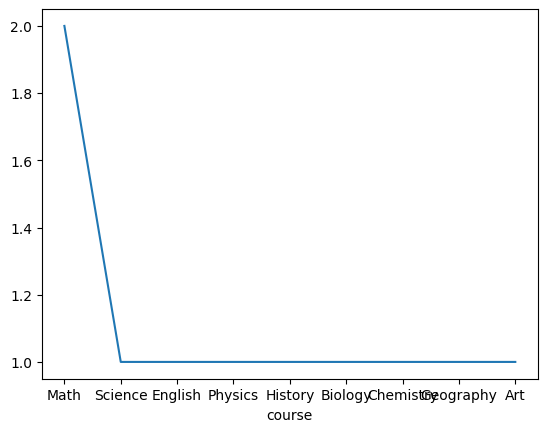

In [94]:
student.course.value_counts().plot()

<Axes: xlabel='course'>

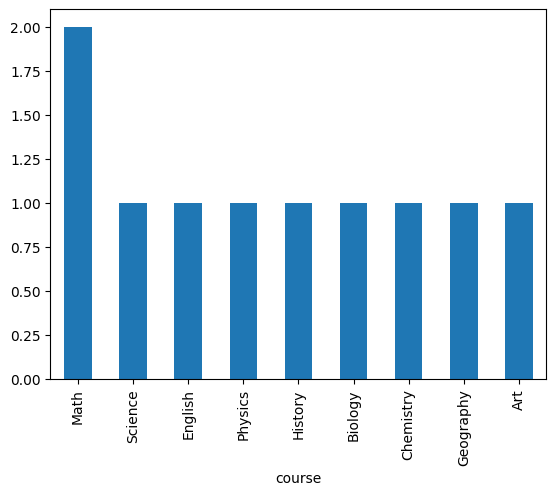

In [96]:
student.course.value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

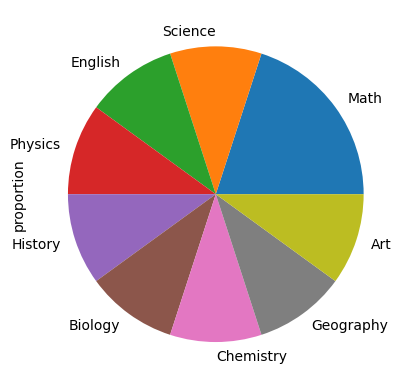

In [98]:
student.course.value_counts(normalize=True).plot(kind='pie')

C:\Users\Muazam Mughal\AppData\Local\Temp\ipykernel_2212\1624146599.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  student.groupby(['course'])[['fee']].aggregate([min , max ,np.mean]).plot(kind='bar')
C:\Users\Muazam Mughal\AppData\Local\Temp\ipykernel_2212\1624146599.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  student.groupby(['course'])[['fee']].aggregate([min , max ,np.mean]).plot(kind='bar')
C:\Users\Muazam Mughal\AppData\Local\Temp\ipykernel_2212\1624146599.py:1: FutureWarning: The provided callable <function mean at 0x000001EDF9AB5260> is currently using SeriesGroupBy.mean. In a future version of pan

<Axes: xlabel='course'>

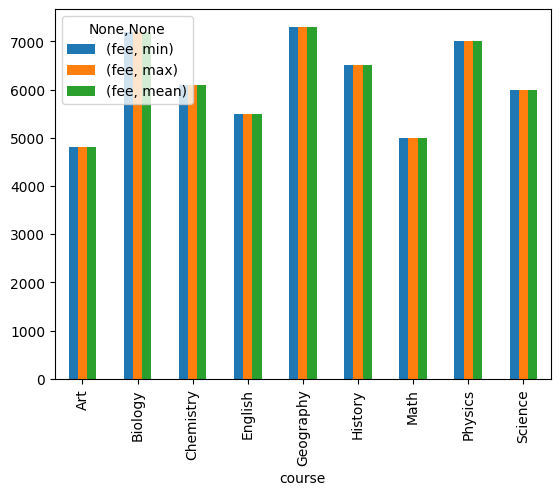

In [99]:
student.groupby(['course'])[['fee']].aggregate([min , max ,np.mean]).plot(kind='bar')

## Data wraggling
* .join
* .merge
* .conca([df1,df2])

# joining
* left join
* right join
* inner join
* outer join
* cross join
